In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import xgi
import matplotlib.pyplot as plt
from src import *
import networkx as nx

In [3]:
G = nx.karate_club_graph()

A = nx.adjacency_matrix(G, weight=None)
n = np.size(A, axis=0)

In [4]:
rho = 0.05
save_data = False

In [25]:
s0 = np.zeros(n)
p_s = 0.2
s0[list(random.sample(range(n), int(p_s * n)))] = 1
nu = 1

c = 2
gamma = 0.2
beta = 0.3

f = lambda I : nu * (I >= c) + (1 - nu) * (1 - (1 - beta)**I)

x = contagion_process(A, gamma, beta, f, s0, tmin=0, tmax=20, dt=1, random_seed=None)

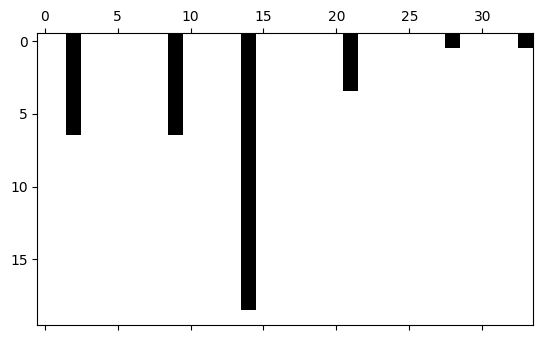

In [26]:
plt.spy(x)

In [27]:
samples = infer_adjacency_matrix(
    x, A, beta, f, rho, nsamples=1000, burn_in=100, skip=100, return_likelihoods=False
)

(1000, 34, 34)
Acceptance ratio is 0.00591


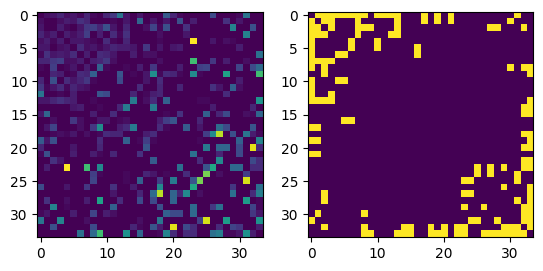

In [28]:
p = np.mean(samples, axis=0)
plt.subplot(121)
plt.imshow(p)
plt.subplot(122)
plt.imshow(A.todense())

In [105]:
accept = 0
it = 1
skip = 10
s_i = skip
burn_in = 11
nsamples = 1
samples = []
while it <= burn_in + (nsamples - 1) * skip:
    print(it, s_i)
    if it >= burn_in:
        if s_i >= skip:
            print("sample")
            samples.append((it, s_i))
            s_i = 1
        else:
            s_i += 1

    it += 1

1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
10 10
11 10
sample


In [93]:
np.shape(samples)

(2, 2, 34, 34)